In [2]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np

data=load_breast_cancer()
df=pd.DataFrame(data.data,columns=data.feature_names)
df['target']=data.target


In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X=df.drop('target',axis=1)
y=df['target']

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)


In [4]:
from sklearn.svm import SVC

svm_linear=SVC(kernel='linear')
svm_linear.fit(X_train,y_train)

svm_rbf=SVC(kernel='rbf',C=1.0,gamma='scale')
svm_rbf.fit(X_train,y_train)

SVC()

In [5]:
from sklearn.metrics import classification_report,confusion_matrix

#Linear SVM Evaluation
y_pred_linear=svm_linear.predict(X_test)
print("Linear SVM Classification Report:\n",classification_report(y_test,y_pred_linear))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_linear))

#RBF SVM Evaluation
y_pred_rbf=svm_rbf.predict(X_test)
print("RBF SVM Classification Report:\n", classification_report(y_test, y_pred_rbf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf))

Linear SVM Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

Confusion Matrix:
 [[41  2]
 [ 3 68]]
RBF SVM Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix:
 [[41  2]
 [ 1 70]]


In [6]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 'gamma': ['scale', 0.01, 0.001], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Score: 0.9736263736263737


In [7]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(SVC(kernel='rbf', C=1, gamma='scale'), X_scaled, y, cv=5)
print("Cross-validation scores:", scores)
print("Mean Accuracy:", scores.mean())


Cross-validation scores: [0.97368421 0.95614035 1.         0.96491228 0.97345133]
Mean Accuracy: 0.9736376339077782


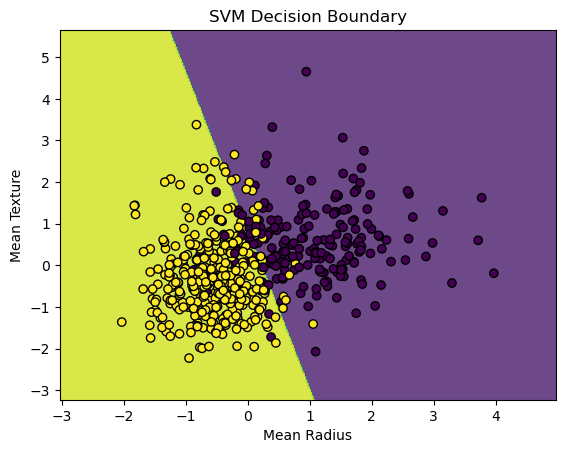

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Select only two features for visualization
X_vis = df[['mean radius', 'mean texture']]
y_vis = df['target']
X_vis_scaled = scaler.fit_transform(X_vis)

model = SVC(kernel='linear')
model.fit(X_vis_scaled, y_vis)

# Plot
h = .02
x_min, x_max = X_vis_scaled[:, 0].min() - 1, X_vis_scaled[:, 0].max() + 1
y_min, y_max = X_vis_scaled[:, 1].min() - 1, X_vis_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_vis_scaled[:, 0], X_vis_scaled[:, 1], c=y_vis, edgecolors='k', marker='o')
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('SVM Decision Boundary')
plt.show()
